## **Installing and Importing Necessary libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report ,f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

In [83]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

Importing Dataset

In [2]:
df=pd.read_excel('/Training Data Dump.xlsx')

Data cleaning & Exploratry Data Analysis

In [3]:
df.head()

,Lead_ID,F2,F3,F4,F5,F7,F8,F9,F10,F11,...,F108,F109,F110,F111,F112,F113,F114,F115,F117,Label
0,197056838,NaT,2024-09-22 08:05:00,NaN,1.0,25517.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,12261,NaN,0,0
1,197056839,NaT,2024-09-22 08:05:00,NaN,2.0,25517.0,1,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,11852,NaN,0,0
2,197057485,NaT,2024-09-22 08:13:00,NaN,3.0,25511.0,1,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,16942,NaN,0,0
3,197058117,NaT,2024-09-22 08:17:00,NaN,2.0,25517.0,1,2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,16248,NaN,0,0
4,197058480,NaT,2024-09-22 08:23:00,NaN,4.0,25517.0,1,2,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,10508,NaN,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 115 entries, Lead_ID to Label
dtypes: datetime64[ns](2), float64(74), int64(39)
memory usage: 8.8 MB


In [5]:
df.isna().sum()

,0
Lead_ID,0
F2,8830
F3,0
F4,8834
F5,1277
...,...
F113,9982
F114,0
F115,9959
F117,0


In [18]:
# Drop columns with a specific threshold of null values:
threshold = 0.8 # Example: drop columns with more than 80% null values
df = df.loc[:, df.isnull().mean() < threshold]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 84 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Lead_ID  10000 non-null  int64         
 1   F3       10000 non-null  datetime64[ns]
 2   F5       8723 non-null   float64       
 3   F7       9834 non-null   float64       
 4   F8       10000 non-null  int64         
 5   F9       10000 non-null  int64         
 6   F10      10000 non-null  int64         
 7   F11      10000 non-null  int64         
 8   F12      10000 non-null  float64       
 9   F13      10000 non-null  float64       
 10  F15      10000 non-null  int64         
 11  F18      9027 non-null   float64       
 12  F19      6819 non-null   float64       
 13  F20      5851 non-null   float64       
 14  F22      2610 non-null   float64       
 15  F23      10000 non-null  int64         
 16  F24      10000 non-null  int64         
 17  F25      10000 non-null  float64

In [20]:
df.duplicated().sum()

0

In [21]:
df.describe()

,Lead_ID,F3,F5,F7,F8,F9,F10,F11,F12,F13,...,F99,F100,F101,F102,F103,F104,F105,F114,F117,Label
count,1.000000e+04,10000,8723.000000,9834.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,...,10000.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,9027.000000,10000.000000,10000.0,10000.000000
mean,2.003409e+08,2024-10-09 14:42:28.517999872,59.435745,23749.615518,2.163000,3.947200,2912.402400,0.0,3.911019,1.267598,...,6.145400,2.508031,9.837044,6.110114,2.508031,9.837044,6.110114,64225.576500,0.0,0.074400
min,1.970567e+08,2024-09-21 00:02:00,1.000000,64.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,31.000000,0.0,0.000000
25%,1.986569e+08,2024-09-28 12:01:15,2.000000,25512.000000,2.000000,1.000000,1249.750000,0.0,0.000000,0.000000,...,3.000000,1.000000,6.000000,3.000000,1.000000,6.000000,3.000000,66766.000000,0.0,0.000000
50%,2.009292e+08,2024-10-12 10:46:30,6.000000,25516.000000,2.000000,3.000000,2499.500000,0.0,0.000000,0.000000,...,6.000000,2.000000,9.000000,6.000000,2.000000,9.000000,6.000000,67557.000000,0.0,0.000000
75%,2.019331e+08,2024-10-18 19:35:00,113.000000,25517.000000,2.000000,4.000000,4531.250000,0.0,0.000000,0.000000,...,9.000000,4.000000,12.000000,9.000000,4.000000,12.000000,9.000000,75320.000000,0.0,0.000000
max,2.030413e+08,2024-10-27 09:51:00,385.000000,34158.000000,24.000000,100.000000,7031.000000,0.0,100.000000,89.583333,...,12.000000,6.000000,18.000000,12.000000,6.000000,18.000000,12.000000,86398.000000,0.0,1.000000
std,1.875632e+06,NaN,79.705883,6680.090255,1.820264,7.233633,1994.430905,0.0,15.016164,8.753030,...,3.716213,1.588171,4.009839,3.722339,1.588171,4.009839,3.722339,21008.333993,0.0,0.262434


Label
0    9256
1     744
Name: count, dtype: int64


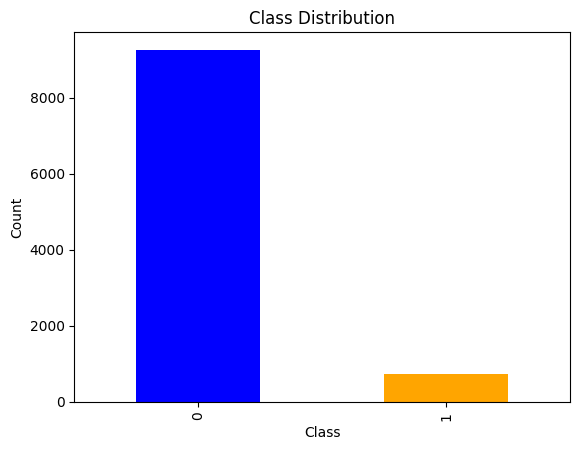

In [22]:
# Check the distribution of the target variable
print(df['Label'].value_counts())

# Visualize the distribution
import matplotlib.pyplot as plt
df['Label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [32]:
# NaN handling using SimpleImputer)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
numerical_features = df.select_dtypes(include=np.number).columns
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [33]:
# Convert datetime columns to Unix timestamp for the entire dataset
for col in df.select_dtypes(include=['datetime64']).columns:
    df[col] = df[col].astype(np.int64) // 10**9  # Convert to unix timestamp

 **Data Preparation And EDA Steps**

> 1. Initally data set consisted of 100000 Rows and 119 columns after which we droped colums with 80% of null values after droping we were left with 84 columns.
2. The given dataset consisted of 0 duplecate values.
3. After which we visualized the distribution of target variable in whichwe found out "0" had 9256 count and "1" had 744 count .  
4. Then Numerical columns with missing values were imputed
using the mean of the respective columns.
5. And  Datetime columns like F2 and F3 were converted into Unix timestamps for easier modeling.









---



Splitting Dataset for training and testing purpose.

In [34]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Label', 'Lead_ID'])
y = df['Label']

In [35]:
# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



*  we use 80-20 split mean the the training data got 80% and the Test data got 20% of dataset.

---







**Support Vector Machine Model**




In [36]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [37]:
# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [73]:
svm = SVC(random_state=42, class_weight='balanced')
svm.fit(X_train_scaled, y_train_smote)

SVC(class_weight='balanced', random_state=42)

In [74]:
# Predict and evaluate the SVM model
y_pred_svm = svm.predict(X_test_scaled)
print("SVM  Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM  Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM  Accuracy: 0.978
SVM  Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1846
         1.0       0.89      0.82      0.85       154

    accuracy                           0.98      2000
   macro avg       0.94      0.90      0.92      2000
weighted avg       0.98      0.98      0.98      2000



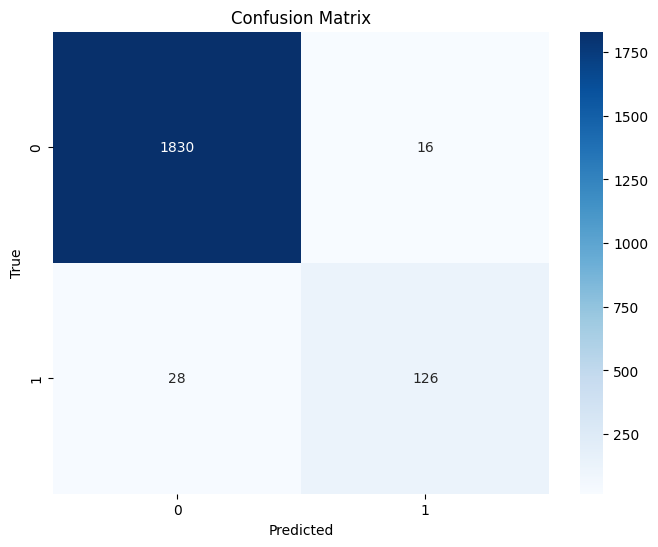

In [85]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

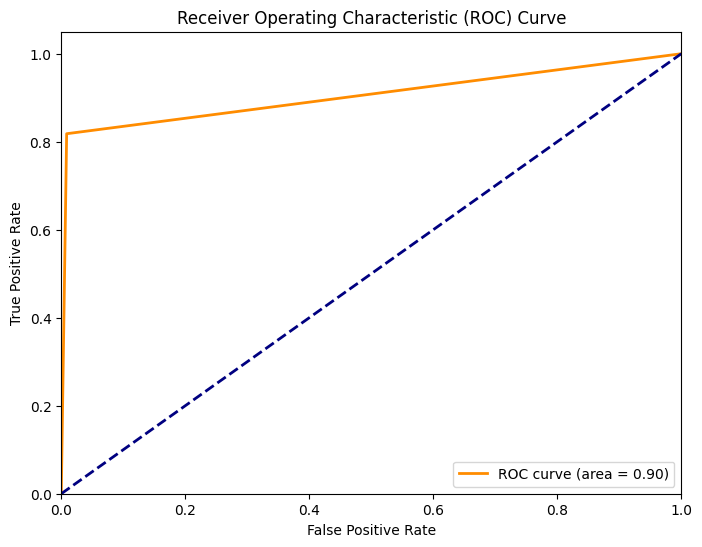

In [86]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


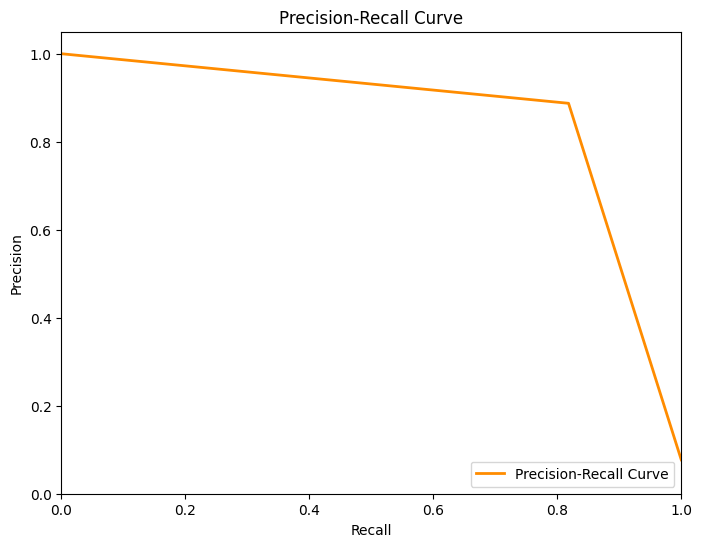

In [88]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

**SVM Report**


1.   We used SMOTE for handling imbalanced class.
2.   Then we did feature scaling which is important for SVM using Standard Scalar from sklearn library.
3. After which we initialized our  SVM model.
4. we tested our model and got the accuracy score and classification Report .

*  The model performs excellently overall with an accuracy of 97.8%.
*   Class 0 (majority class) is predicted with high precision and recall, while Class 1 (minority class) has a lower recall (82%) but decent precision (89%).
*  F1-Score is high for both classes, indicating balanced performance despite the class imbalance.
5. Then we visualized confussion Matrix.
6. Next we visualized ROC curve where Area= 90%.
7. In last we visualized Precision-Recall Curve.

---












**Hyperparameter Tuning For Random Forest**



In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [76]:
# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

In [77]:
# Initialize Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [78]:
# Perform Randomized Search with Cross-Validation
rf_random = RandomizedSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1')

In [79]:
# Best Random Forest model
best_rf = rf_random.best_estimator_
print("Best RF Parameters:", rf_random.best_params_)

Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}


In [82]:
# Predictions on Test Set
rf_y_pred = best_rf.predict(X_test)
print("Random Forest  Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest  Classification Report:\n", classification_report(y_test, rf_y_pred))

Random Forest  Accuracy: 0.996
Random Forest  Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1846
         1.0       0.97      0.97      0.97       154

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



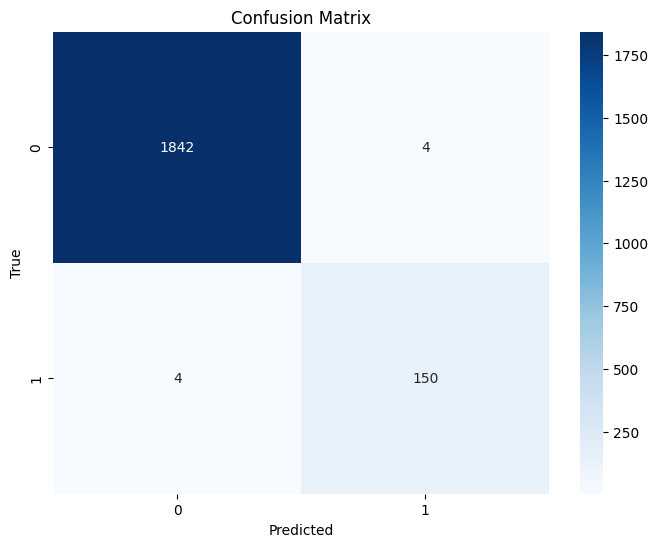

In [89]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

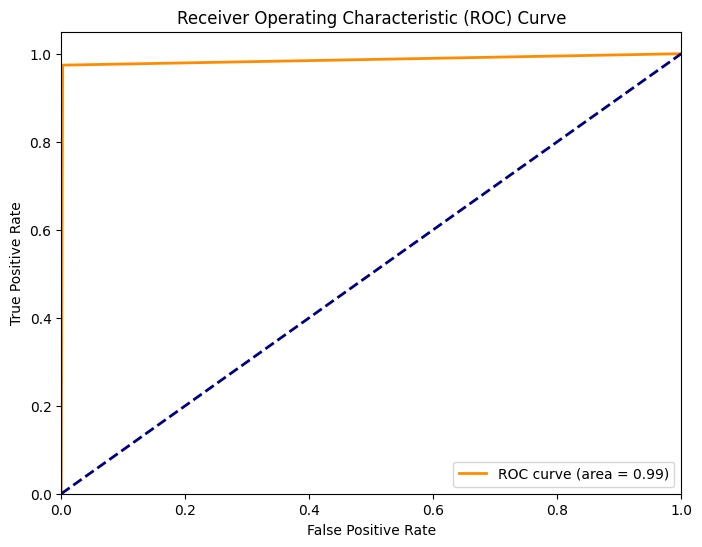

In [90]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


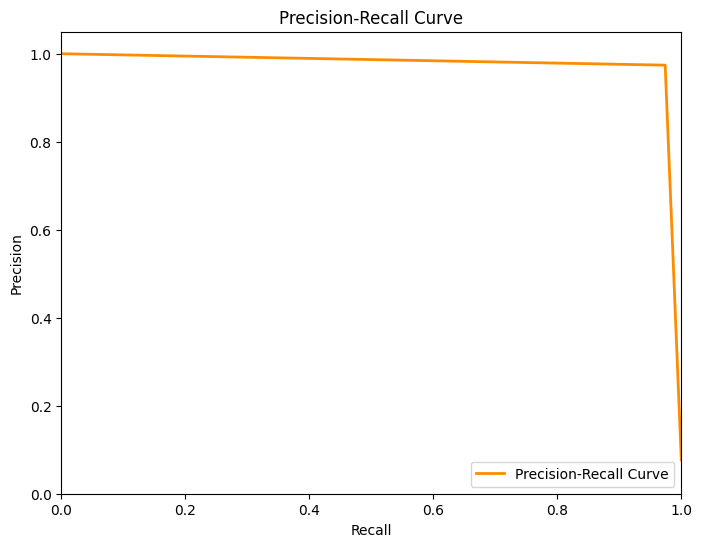

In [91]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

**Report for Hyperparameter Tuning of Random Forest Model**


1.   We use Random Search cv from sklearn library for hyperparameter tuning of our random forest model .
2.   we first defined hyperparameter grid for our Random Forest model.
3. Then we initalized our Random Forest Model.
4. After which Performed  Randomized Search with Cross-Validation from which we got our best random forest mode with parameters

  `Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}`

5.we tested our model and got the accuracy score and classification Report .


*   The Random Forest model performs exceptionally well, with an overall accuracy of 99.6%.
*   Class 0 (majority class) is perfectly predicted with 100% precision and recall.
* Class 1 (minority class) is also predicted well, with a precision and recall of 97%, indicating effective handling of the imbalance.
* The F1-Score is close to 1 for both classes, reflecting a balanced performance.


6. Then we visualized confussion Matrix.
7. Next we visualized ROC curve where Area= 99%.
8. In last we visualized Precision-Recall Curve.


---



---







***Conclusion: Random Forest performed best for the given Machine learning binary classification problem***

---



---
